In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import adtk.detector as detector
import adtk.transformer as transformer
import adtk.aggregator as aggregator
from adtk.visualization import plot

# Single Series, no anomaly

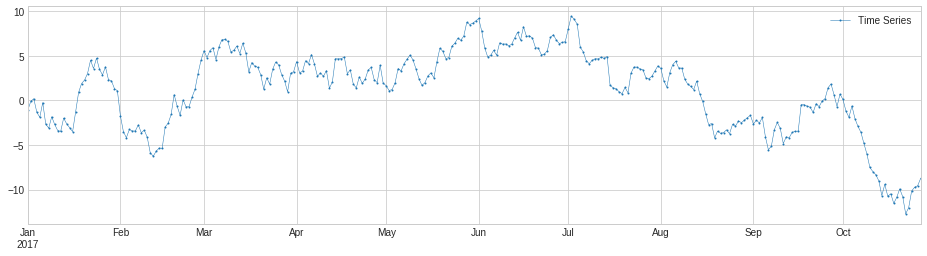

In [2]:
rand = np.random.RandomState(123)
s = pd.Series(np.cumsum(rand.normal(size=300)), index=pd.date_range(start="2017-1-1", periods=300, freq="D"))

plot(s);

# Single Series, single anomaly

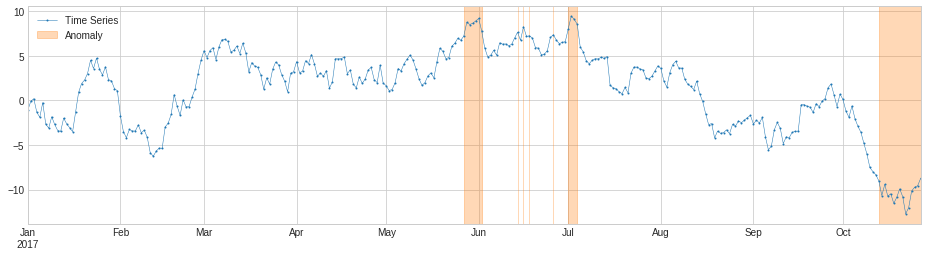

In [3]:
anomaly = detector.QuantileAD(low=0.05, high=0.95).fit_detect(s, return_list=False)
plot(s, anomaly);

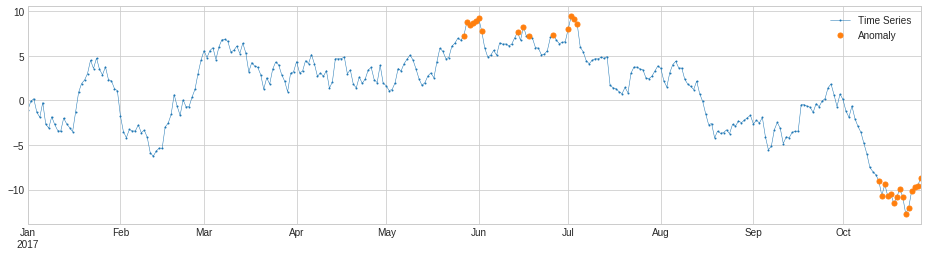

In [4]:
anomaly = detector.QuantileAD(low=0.05, high=0.95).fit_detect(s, return_list=False)
plot(s, anomaly, anomaly_tag="marker");

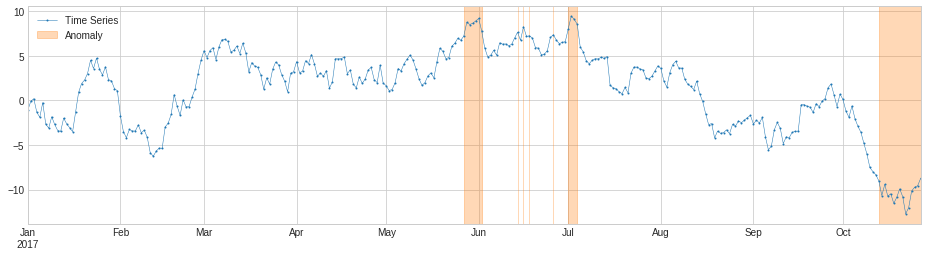

In [5]:
anomaly = detector.QuantileAD(low=0.05, high=0.95).fit_detect(s, return_list=True)
plot(s, anomaly);

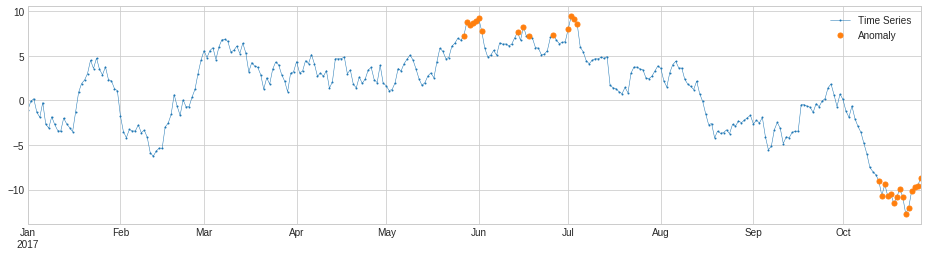

In [6]:
anomaly = detector.QuantileAD(low=0.05, high=0.95).fit_detect(s, return_list=True)
plot(s, anomaly, anomaly_tag="marker");

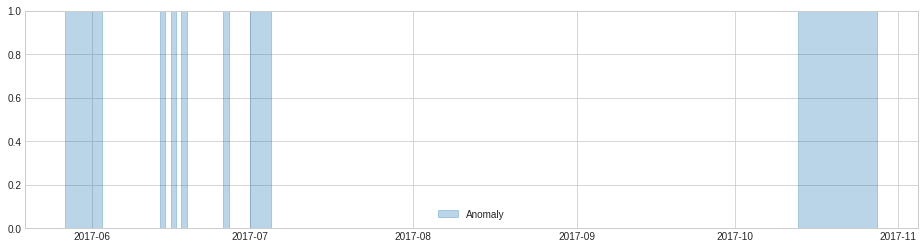

In [7]:
plot(None, anomaly);

# Single Series, multiple anomalies

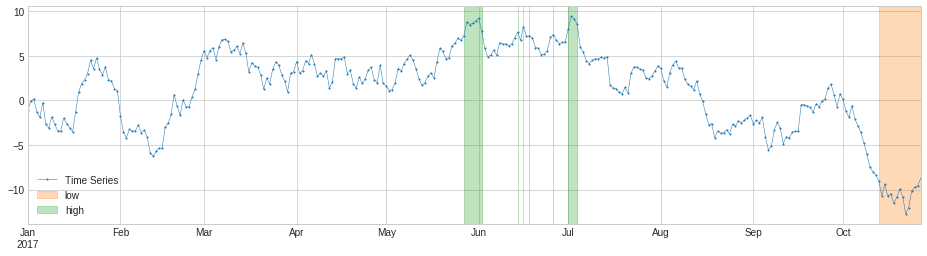

In [8]:
low = detector.QuantileAD(low=0.05).fit_detect(s, return_list=True)
high = detector.QuantileAD(high=0.95).fit_detect(s, return_list=True)
anomaly = {"low": low, "high": high}
plot(s, anomaly);

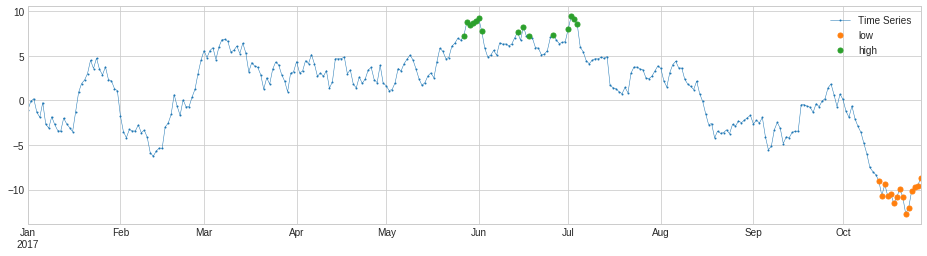

In [9]:
plot(s, anomaly, anomaly_tag="marker");

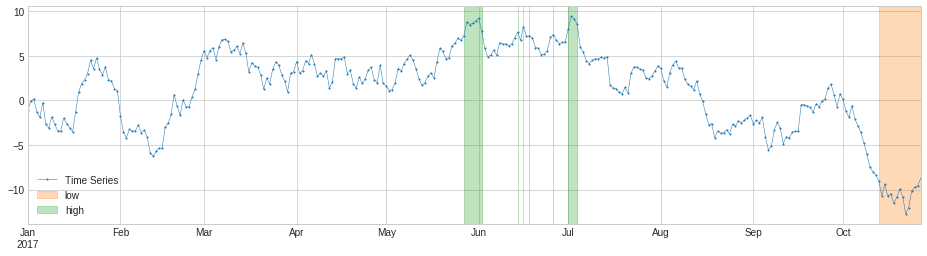

In [10]:
low = detector.QuantileAD(low=0.05).fit_detect(s, return_list=False)
high = detector.QuantileAD(high=0.95).fit_detect(s, return_list=False)
anomaly = {"low": low, "high": high}
plot(s, anomaly);

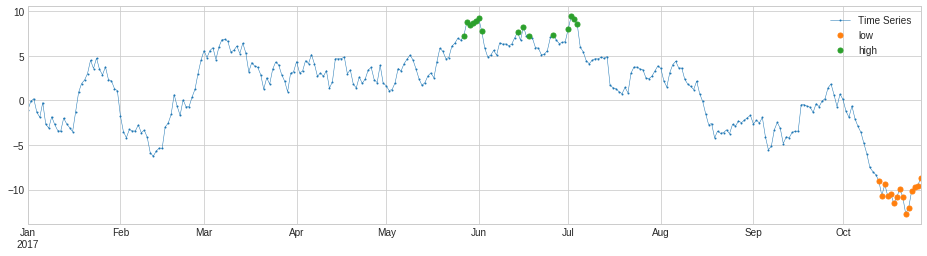

In [11]:
plot(s, anomaly, anomaly_tag="marker");

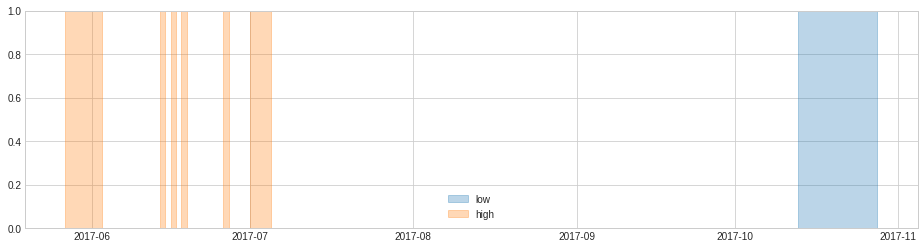

In [12]:
plot(None, anomaly);

# Multiple Series, no anomaly

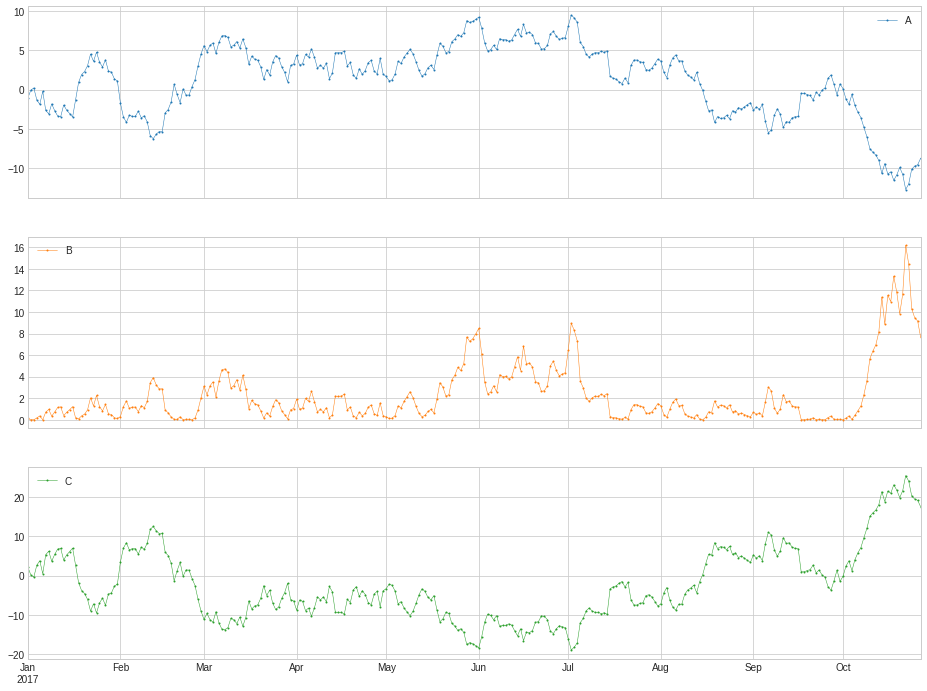

In [13]:
df = pd.concat([s.rename('A'), (s**2/10).rename("B"), (-s*2).rename("C")], axis=1)
plot(df);

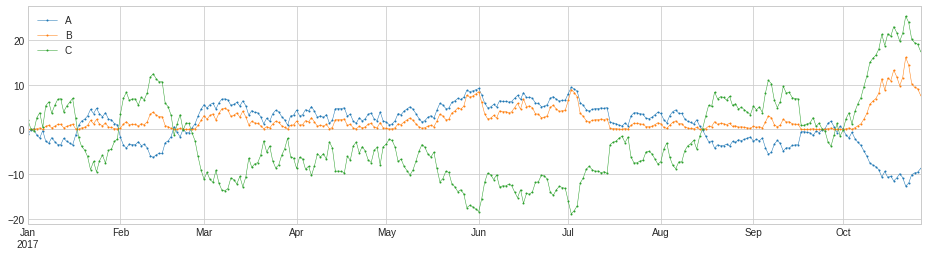

In [14]:
plot(df, curve_group='all');

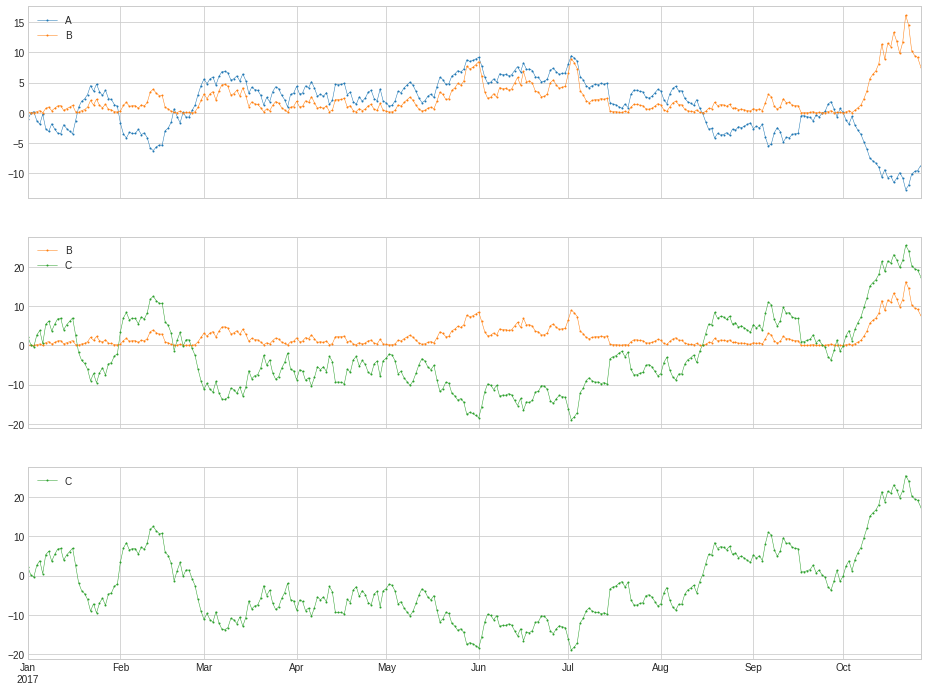

In [15]:
plot(df, curve_group=[["A", "B"], ["B", "C"], "C"]);

# Multiple Series, single anomaly

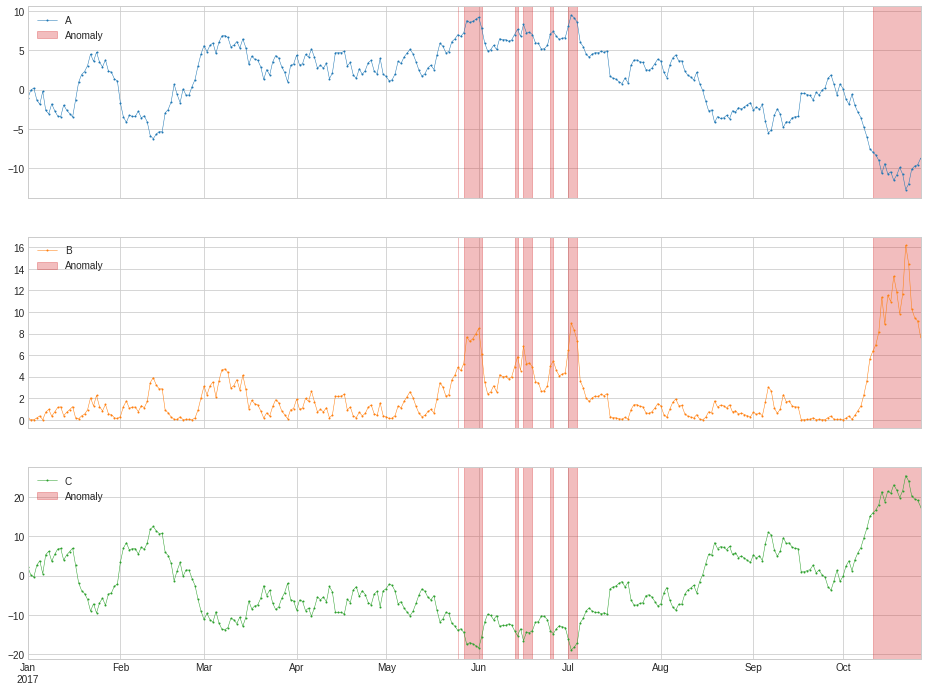

In [16]:
anomaly = detector.PcaAD(k=1, c=1).fit_detect(df)
plot(df, anomaly);

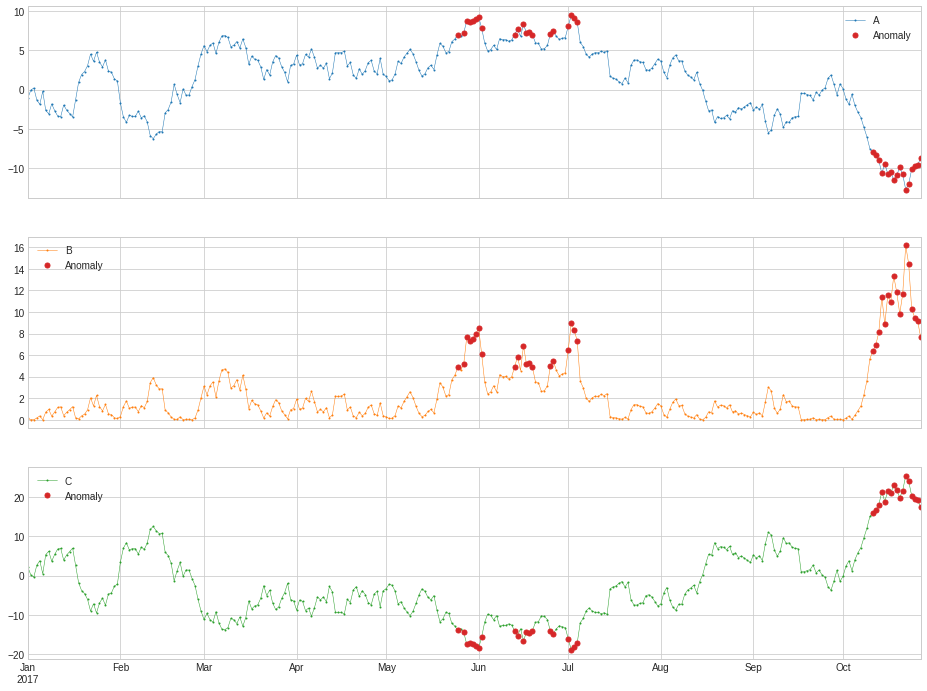

In [17]:
plot(df, anomaly, anomaly_tag="marker");

# Multiple Series, respective anomaly

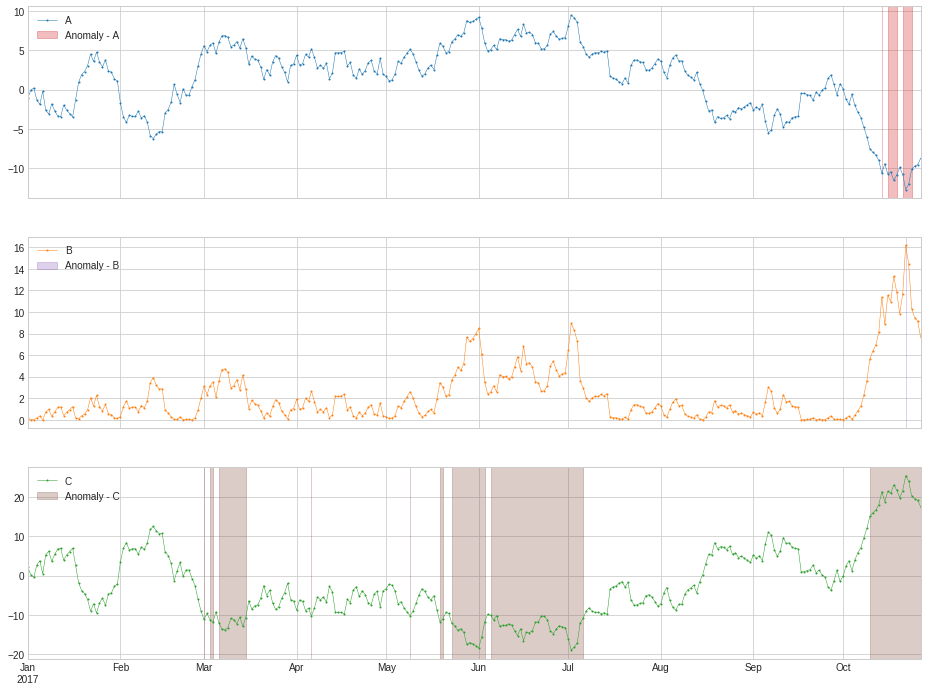

In [18]:
anomaly = detector.ThresholdAD(low=-10, high=15).fit_detect(df)
plot(df, anomaly);

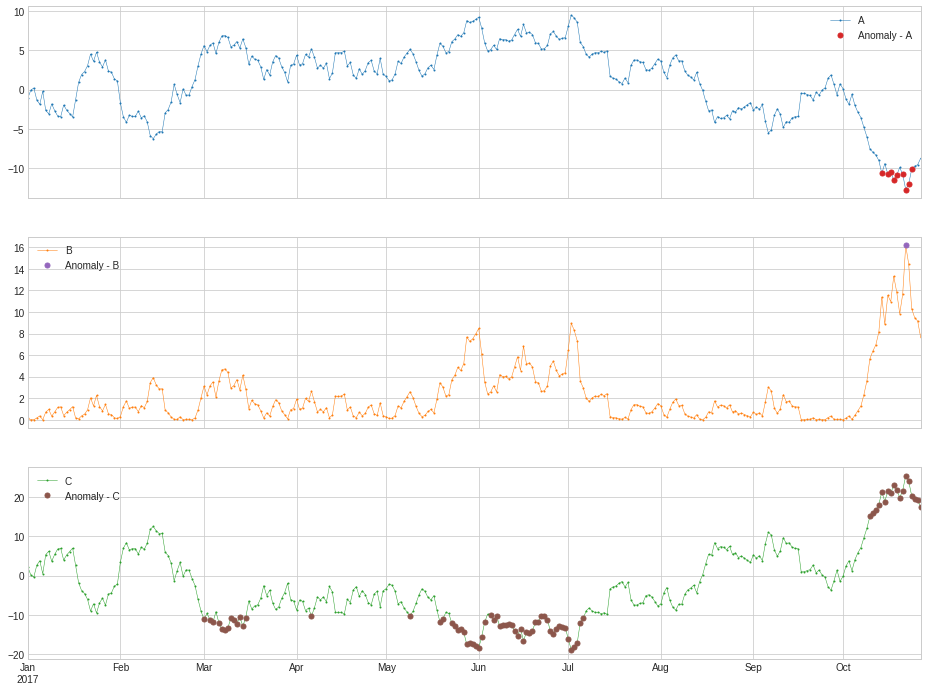

In [19]:
plot(df, anomaly, anomaly_tag="marker");

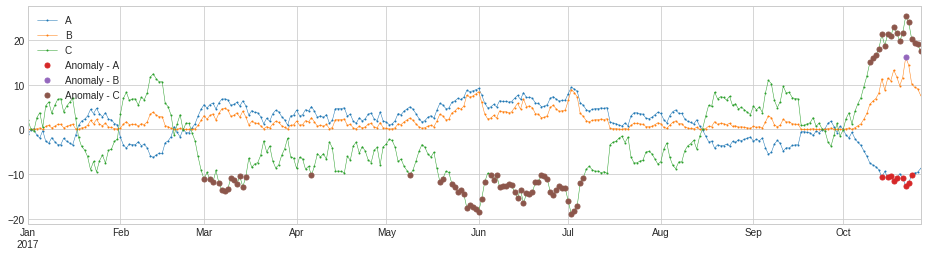

In [20]:
plot(df, anomaly, curve_group="all", anomaly_tag="marker");

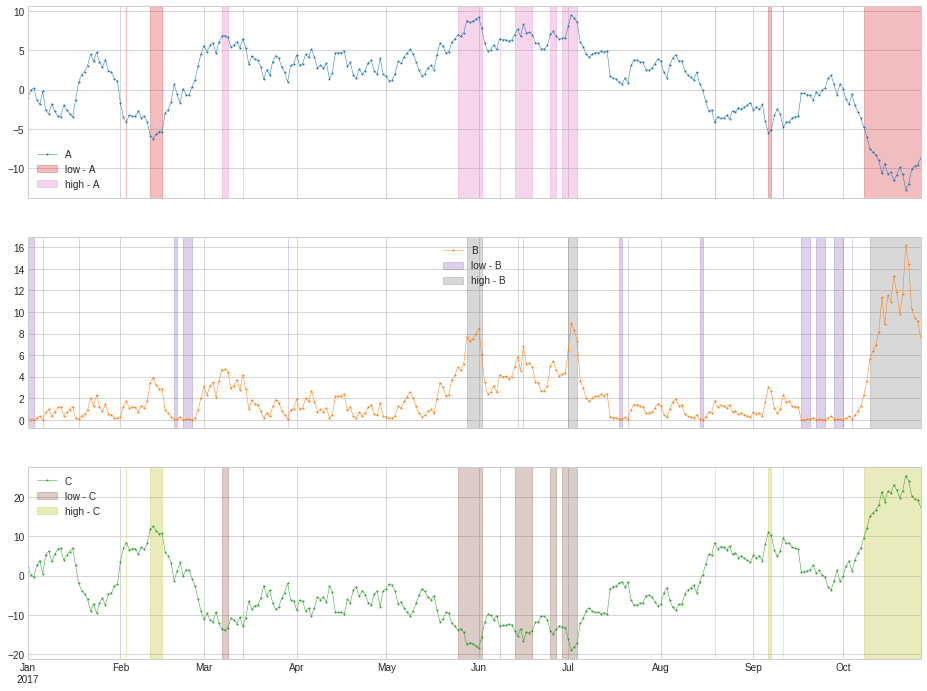

In [21]:
anomaly = {
    "low": detector.QuantileAD(low=0.1).fit_detect(df),
    "high": detector.QuantileAD(high=0.9).fit_detect(df)
}
plot(df, anomaly);

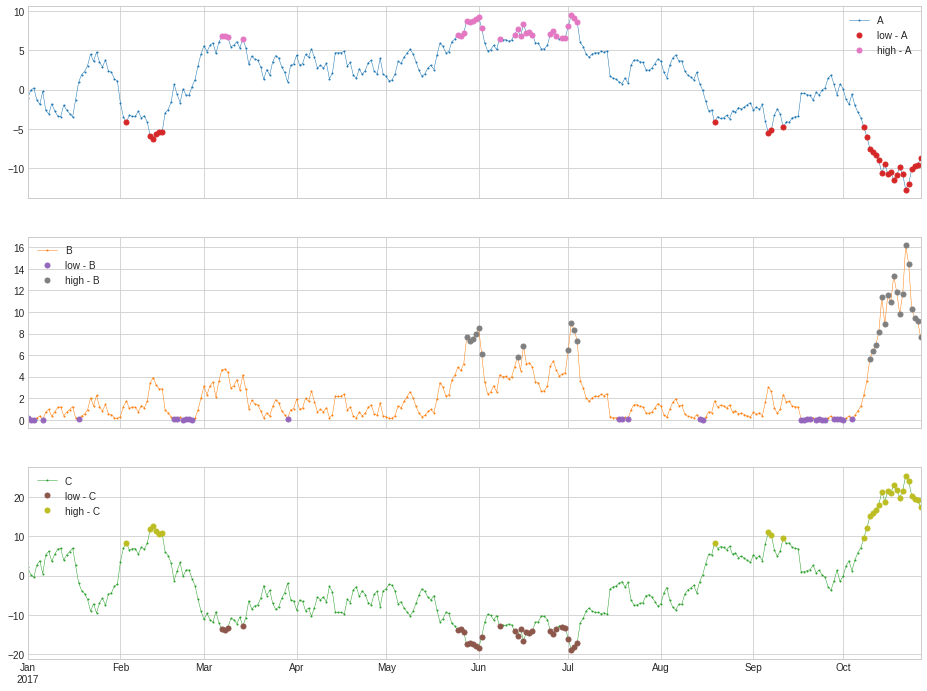

In [22]:
plot(df, anomaly, anomaly_tag="marker");

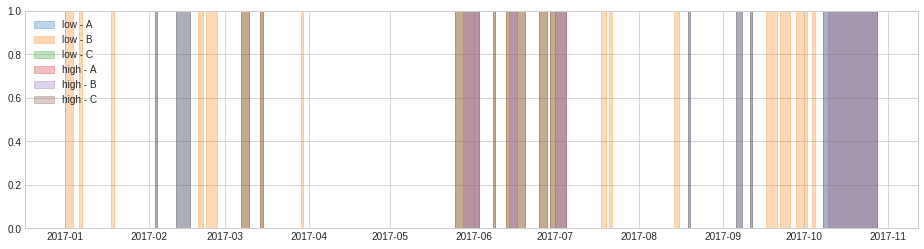

In [23]:
plot(None, anomaly);

# Multiple Series, multiple anomaly

In [24]:
anomaly = {
    "low": detector.QuantileAD(low=0.1).fit_detect(df),
    "high": detector.QuantileAD(high=0.9).fit_detect(df),
    "pca": detector.PcaAD(k=1).fit_detect(df)
}

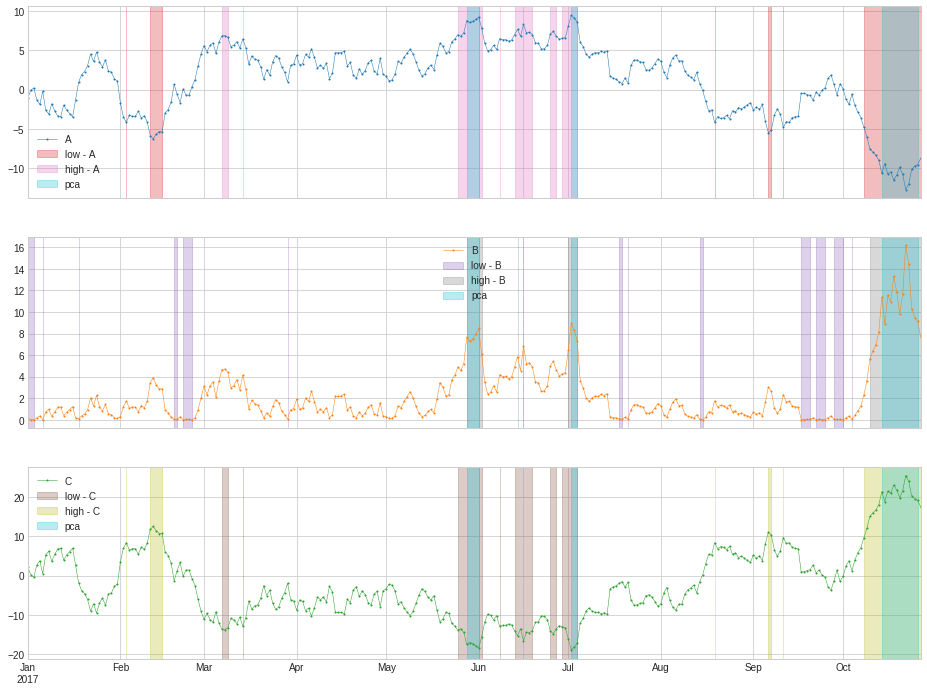

In [25]:
plot(df, anomaly);

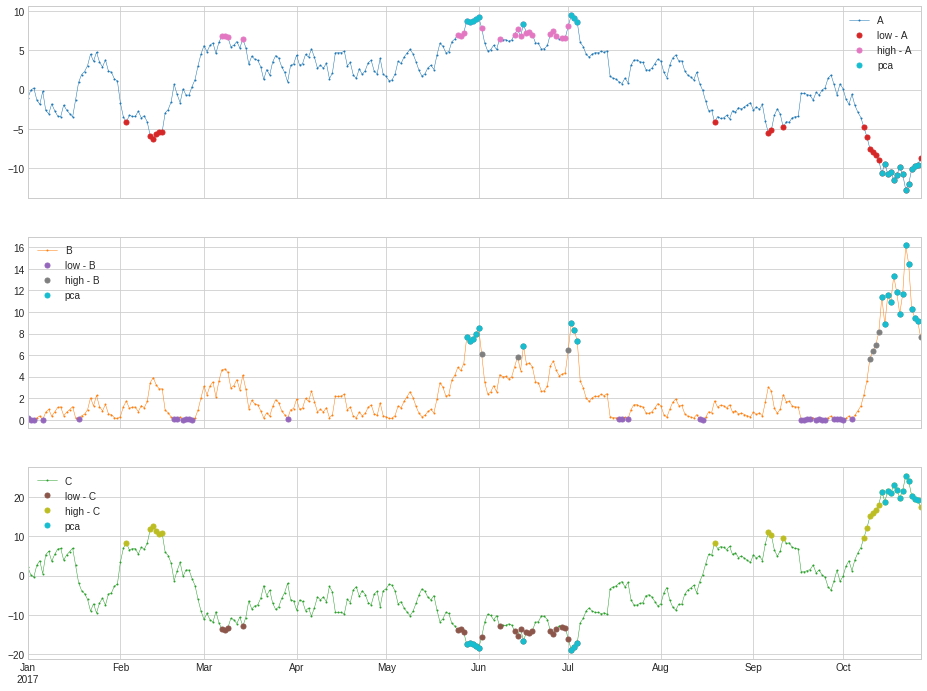

In [26]:
plot(df, anomaly, anomaly_tag="marker");

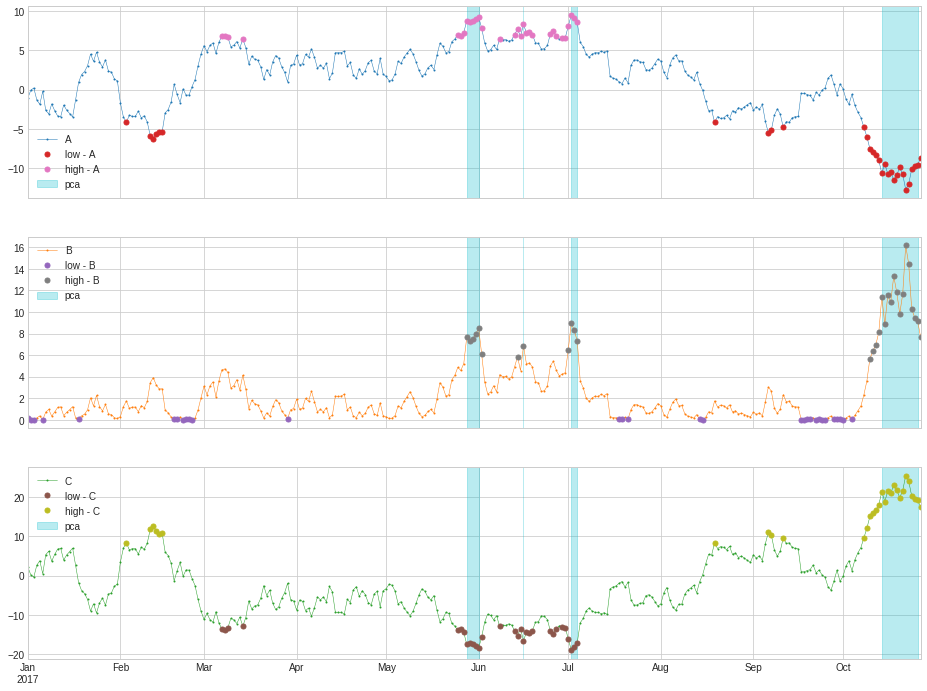

In [27]:
plot(df, anomaly, anomaly_tag={"low":"marker", "high":"marker"});

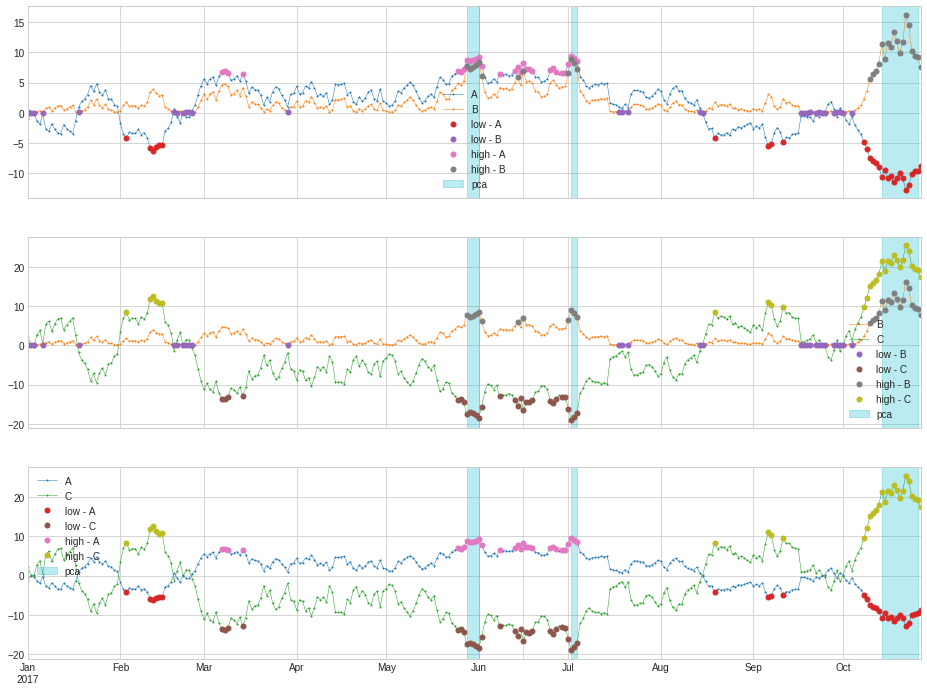

In [28]:
plot(df, anomaly, curve_group=[("A", "B"), ("B", "C"), ("C", "A")], anomaly_tag={"low":"marker", "high":"marker"});

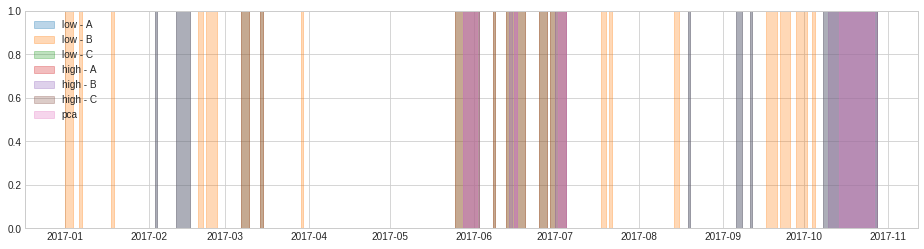

In [29]:
plot(None, anomaly);

# Play with properties

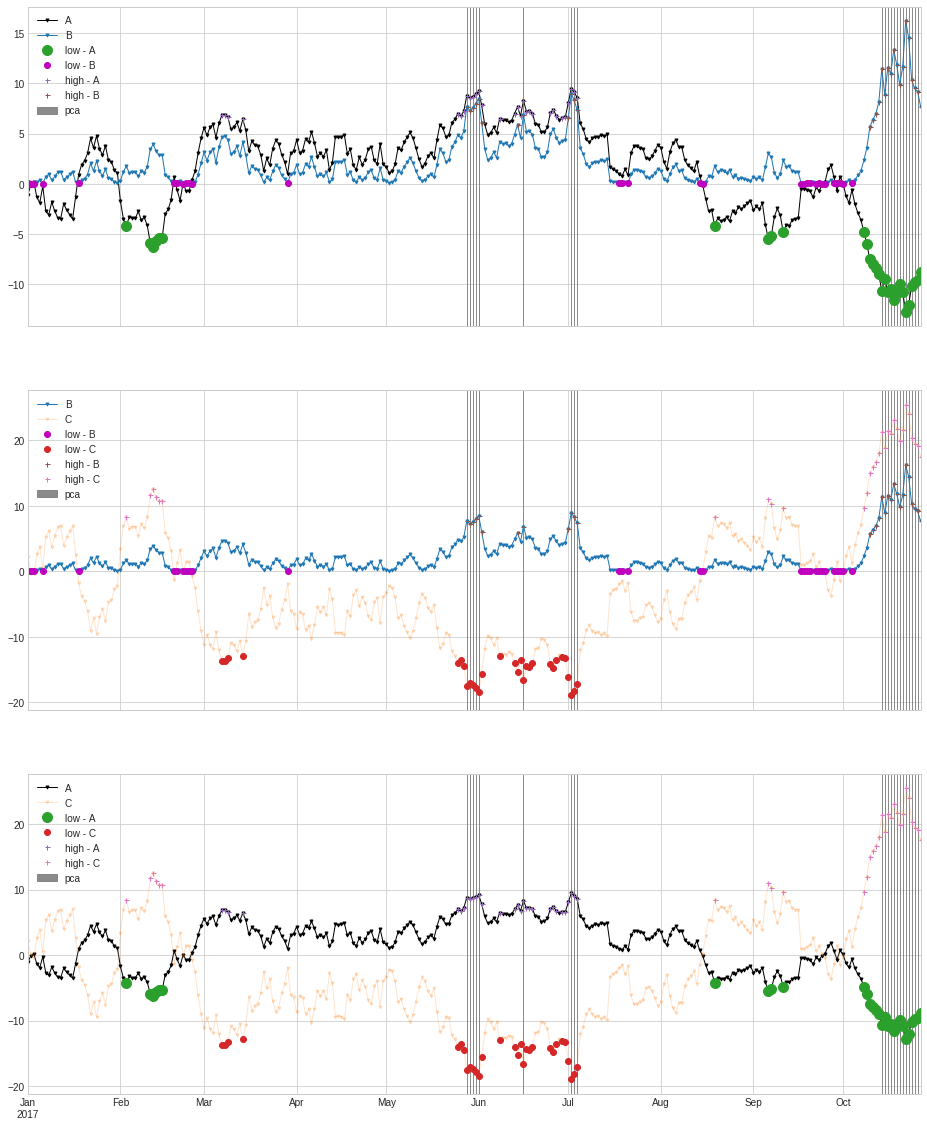

In [30]:
plot(df, anomaly, curve_group=[("A", "B"), ("B", "C"), ("C", "A")],
     ts_linewidth=1,
     ts_marker='v',
     ts_markersize=3,
     ts_alpha={"C": 0.2},
     ts_color={"A":"k"},
     anomaly_tag={"low":"marker", "high":"marker"},
     anomaly_color={"low":{"B":"m"}},
     anomaly_alpha=0.9,
     anomaly_marker={"high":"+"},
     anomaly_markersize={"low":{"A": 10}},
     freq_as_period=False,
     figsize=(16, 20)
    );

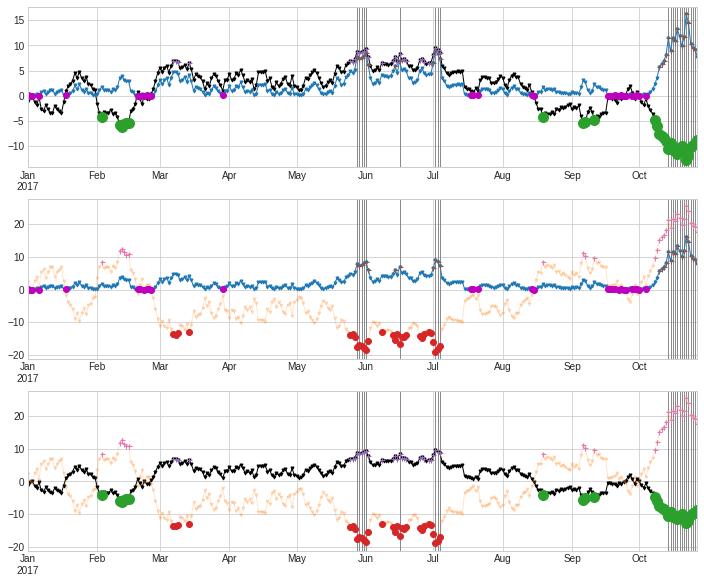

In [31]:
f, axes = plt.subplots(nrows=3, figsize=(12,10))
plot(df, anomaly, curve_group=[("A", "B"), ("B", "C"), ("C", "A")],
     ts_linewidth=1,
     ts_marker='v',
     ts_markersize=3,
     ts_alpha={"C": 0.2},
     ts_color={"A":"k"},
     anomaly_tag={"low":"marker", "high":"marker"},
     anomaly_color={"low":{"B":"m"}},
     anomaly_alpha=0.9,
     anomaly_marker={"high":"+"},
     anomaly_markersize={"low":{"A": 10}},
     freq_as_period=False,
     axes=axes,
     legend=False
    );

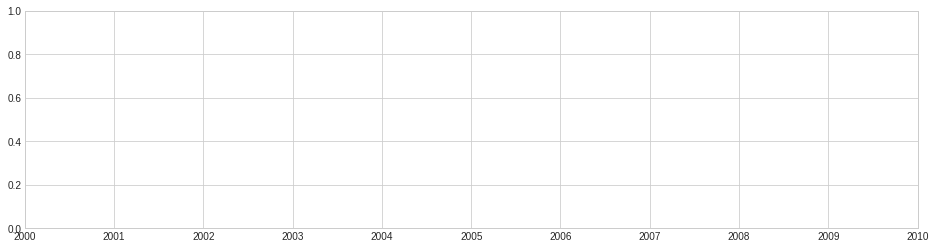

In [32]:
plot();